# Movie Data Analysis  
This notebook uses a dataset from the MovieLens website.  
Download the Dataset from: https://grouplens.org/datasets/movielens/25m/  

Once the download completes, unzip it. 

The ! allows running o/s commands from the notebook. Here, the files in this dataset are listed, using the UNIX command ls. Windows is dir command

In [6]:
!ls ../Datasets/ml-25m

README.txt        genome-tags.csv   movies.csv        tags.csv
genome-scores.csv links.csv         ratings.csv


## Use Pandas to Read the Dataset
Read the following CSV files, using Using the read_csv function in pandas
 * ratings.csv : userId,movieId,rating, timestamp
 * tags.csv : userId,movieId, tag, timestamp
 * movies.csv : movieId, title, genres 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
folder = '../Datasets/ml-25m/'
movies = pd.read_csv(folder + 'movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
# read tags, timestamps represent seconds since midnight of January 1, 1970
tags = pd.read_csv(folder + 'tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [10]:
# read ratings, automatically parse date fields given parse_dates parameter
ratings = pd.read_csv(folder + 'ratings.csv', sep=',' , parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


## Series Data

In [11]:
#Extract 0th row: notice that it is a Series
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [12]:
print(row_0)

userId                3
movieId             260
tag             classic
timestamp    1439472355
Name: 0, dtype: object


In [13]:
row_0.index

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [16]:
# getting the value of a column, 2 ways
print(row_0['userId'])
print(row_0.userId)

# check if column 'rating' exists
'rating' in row_0

3
3


False

## DataFrame

In [17]:
# head displays the first 5 rows of a dataframe by default.
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [18]:
tags.head(10)  # displays first 10

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
5,4,44665,unreliable narrators,1573943619
6,4,115569,tense,1573943077
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033
9,4,115713,tense,1573943042


In [19]:
# column names
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [21]:
# Extract row 0, 11, 2000 using index location: iloc
tags.iloc[ [0,11,2000] ]

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
11,4,164909,cliche,1573943721
2000,647,164179,twist ending,1505599624


## Descriptive Statistics

In [22]:
# displays descriptive stats in a single function
ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [23]:
# average for just the ratings column
ratings['rating'].mean()

3.533854451353085

In [24]:
# mean for all columns, get rid of timestamp first
del ratings['timestamp']

ratings.mean()

userId     81189.281154
movieId    21387.981943
rating         3.533854
dtype: float64

In [25]:
# other summary statistics
print(ratings['rating'].min())
print(ratings['rating'].max())
print(ratings['rating'].std())
print(ratings['rating'].mode())

0.5
5.0
1.060743961142352
0    4.0
dtype: float64


### Variable Correlation  
How are 2 or more quantitative variables related. Values near 0, mean no corrleation, close to 1 or -1 mean postive/negative correlation.

In [26]:
# returns the correlation matrix for the entire dataframe
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.004413,0.001940
movieId,-0.004413,1.000000,-0.009216
rating,0.001940,-0.009216,1.000000


userId and userId are the same values with perfect correlation of 1
rating and movieId are negatively correlated, though value is very close to 0 so there is not much correlaton

In [27]:
# returns the correlation between 2 variables
ratings['rating'].corr(ratings['movieId'])

-0.009216157858011465

### Filtering

In [28]:
# any ratings  > 5
high = ratings['rating'] > 5
high.any()

False

In [29]:
print('max', ratings['rating'].max())
print('min', ratings['rating'].min())

max 5.0
min 0.5


In [30]:
# any ratings  > 0
anyRating = ratings['rating'] > 0
anyRating.all()

True

## Data Cleaning: Handling Missing Data

In [32]:
# shape of the dataframe, returns number of rows and columns
movies.shape

(62423, 3)

In [33]:
#any row NULL ?
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [34]:
ratings.shape

(25000095, 3)

In [35]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [36]:
tags.shape

(1093360, 4)

In [37]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [38]:
tags = tags.dropna()

In [39]:
#Check again
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [40]:
tags.shape

(1093344, 4)

## Data Visualization
Pandas Series and DataFrame is wrapper around matplotlib pyplot library

### Using matplotlib pyplot directly

In [42]:
# create a count of ratings by movie
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


<BarContainer object of 10 artists>

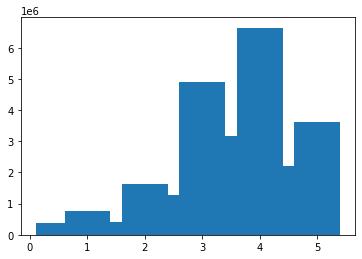

In [43]:
# bar chart
plt.bar(ratings_count.index, ratings_count['movieId'])

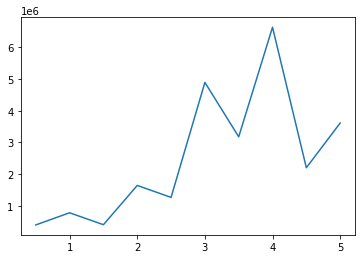

In [44]:
# line chart
plt.plot(ratings_count['movieId'])

### Dataframe and series plot wraps matplotlib plot() for convenience

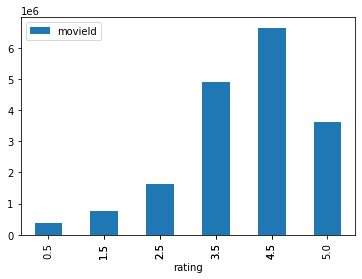

In [45]:
# bar chart, used to show categorical values or trends
p = ratings_count.plot.bar()

movieId    1920703.5
dtype: float64


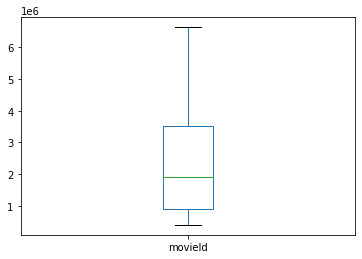

In [46]:
# box plot, shows how data is dispersed; lower quantile, median, upper quantiles and extreme/outliers values
# the median is just under 2 million
print (ratings_count.median())

p = ratings_count.plot.box()

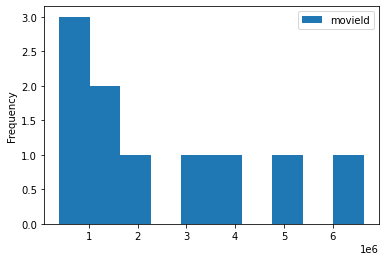

In [47]:
# histogram shows data skewness. In this case, data is skewed right
p = ratings_count.plot.hist()

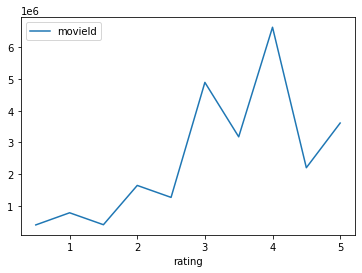

In [48]:
# line graph used to show trend
p = ratings_count.plot()

In [49]:
# series darta. first 10 tags by movie genre
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
Name: tag, dtype: int64

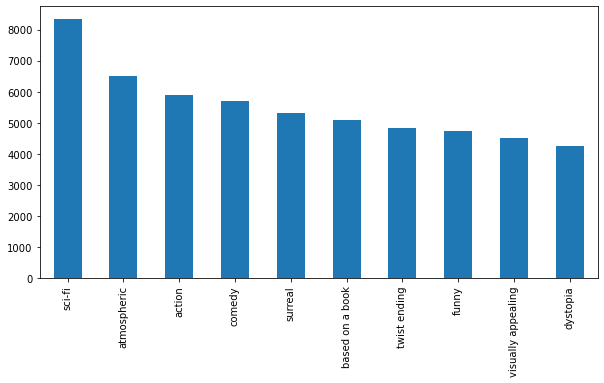

In [50]:
# pandas series plot. Plot a bar plot. optionally figsize for graph size
tag_counts[:10].plot(kind='bar', figsize=(10,5));

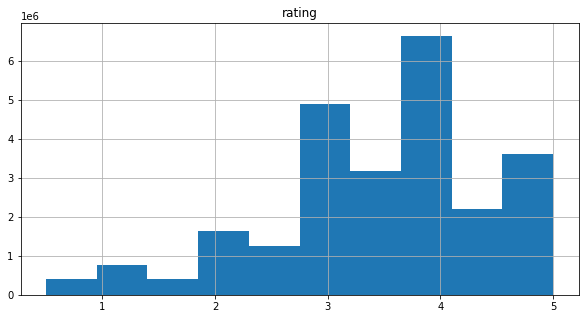

In [51]:
# histogram, figsize optionally defines # of cols, rows for the graph, specify the column to plot
p=ratings.hist(column='rating', figsize=(10,5)) 

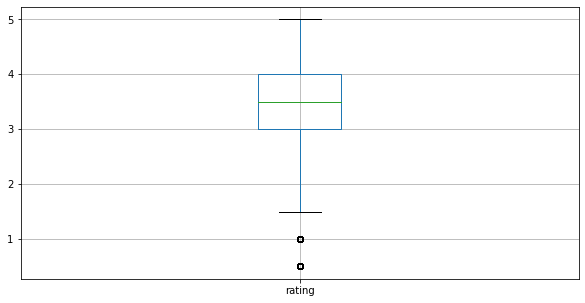

In [52]:
# boxplot, optional figsize
p = ratings.boxplot(column='rating', figsize=(10,5))

### Slicing Columns

In [53]:
tags.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [58]:
#get the tag column by column name. returns a series
tags['tag'].head()

0             classic
1              sci-fi
2         dark comedy
3      great dialogue
4    so bad it's good
Name: tag, dtype: object

In [57]:
# multiple columns using [], returns dataframe
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [59]:
ratings.head(2)

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5


In [60]:
# get range of ratings using slicing
ratings[1000:1010]

,userId,movieId,rating
1000,4,45517,2.5
1001,4,45722,3.5
1002,4,46948,2.5
1003,4,46972,3.5
1004,4,48780,5.0
1005,4,48982,3.0
1006,4,49272,3.5
1007,4,49396,3.5
1008,4,49649,1.0
1009,4,50601,1.5


### Filters for Selecting Rows

In [61]:
# highly rated movies
highly_rated = ratings['rating'] >= 4.0

ratings[highly_rated][-5:] # last 5

,userId,movieId,rating
25000088,162541,41566,4.0
25000089,162541,45517,4.5
25000090,162541,50872,4.5
25000093,162541,58559,4.0
25000094,162541,63876,5.0


In [62]:
# aninmation movies
animation = movies['genres'].str.contains('Animation')

# range of animation movies using slicing
movies[animation][5:15]

,movieId,title,genres
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
586,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
587,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
588,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
602,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


## Group By and Aggregate

In [63]:
# get rating counts by movie as a dataframe
ratings_count = ratings[['movieId','rating']].groupby('rating').count()

ratings_count

,movieId
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


In [64]:
# get average rating by movie as a dataframe, display the last 5 rows
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()

average_rating.tail()

,rating
movieId,
209157,1.5
209159,3.0
209163,4.5
209169,3.0
209171,3.0


In [65]:
# get number of ratings by movie, display the first 5 rows
movie_count = ratings[['movieId','rating']].groupby('movieId').count()

movie_count.head()

,rating
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714


In [66]:
# get number of ratings by movie, display the last 5 rows
movie_count = ratings[['movieId','rating']].groupby('movieId').count()

movie_count.tail()

,rating
movieId,
209157,1
209159,1
209163,1
209169,1
209171,1


## Combing Dataframes

In [67]:
tags.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [68]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [69]:
# concatenting 2 data frames. columns that doen't exist in the original dataframe have missing values (NaN)
# the resulting DataFrame will have the columns from both dataframes
c = pd.concat([movies, tags])
c.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN


In [70]:
a = movies.append(tags)
a.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN


In [71]:
# merge movies and tags dataframe on movieId using inner join
# inner join combines the column values of two DataFrames,
t = movies.merge(tags, on='movieId', how='inner')

t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned,1515175493
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1048,imdb top 250,1172144394
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1361,Pixar,1216146311
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,Pixar,1223304727
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,time travel,1223304729


### Combine aggregation, merging, and filters for analytic

In [72]:
ratings.head(2)

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5


In [73]:
# group by movieId and get the mean of each column
avg_ratings = ratings.groupby('movieId', as_index=False).mean()

# del userId column
del avg_ratings['userId']

avg_ratings.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


In [74]:
# merge avg_ratings and movies 
box_office = movies.merge(avg_ratings, on='movieId', how='inner')

box_office.tail()

,movieId,title,genres,rating
59042,209157,We (2018),Drama,1.5
59043,209159,Window of the Soul (2001),Documentary,3.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5
59045,209169,A Girl Thing (2001),(no genres listed),3.0
59046,209171,Women of Devil's Island (1962),Action|Adventure|Drama,3.0


In [75]:
# last 5 of highly rated movies
highly_rated = box_office['rating'] >= 4.0

box_office[highly_rated][-5:] 

,movieId,title,genres,rating
59027,209121,Adrenalin: The BMW Touring Car Story (2014),Documentary,4.0
59028,209123,Square Roots: The Story of SpongeBob SquarePan...,Documentary,4.0
59029,209129,Destination Titan (2011),Documentary,4.5
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5


In [76]:
# first 5 of comedies
comedy = box_office['genres'].str.contains('Comedy')

box_office[comedy][:5] 

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434
6,7,Sabrina (1995),Comedy|Romance,3.363666


In [77]:
# last 5 rows of highly rated comedies
box_office[comedy & highly_rated][-5:]

,movieId,title,genres,rating
58990,208911,Cheating in Chains (2006),Comedy,4.0000
58998,208939,Klaus (2019),Adventure|Animation|Children|Comedy,4.3125
59001,208945,Powder (2019),Comedy|Drama,4.5000
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0000
59044,209163,Bad Poems (2018),Comedy|Drama,4.5000


### String Operations

In [78]:
# string operation split 'genres' into multiple columns, returned as dataframe
# split into multiple columns, on a delimiter in the string.

print(movies.iloc[0]['genres'])

movie_genres = movies['genres'].str.split('|', expand=True)

movie_genres[:5] # first 5 rows

Adventure|Animation|Children|Comedy|Fantasy


,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


In [79]:
# Add a new flag column for comedy genre using string contains function
# contains looks for a match by string value
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

movie_genres[:5] # first 5

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True


In [80]:
# Add a year column, by extracting year from title e.g. (1995) with regular expressions
# extract find the first match matching the regular expression pattern

print(movies.loc[0]['title'])

movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

movies.tail()

Toy Story (1995)


,movieId,title,genres,year
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962


## Working with Timestamps  
Timestamps are used in time series datasets.

In [83]:
tags = pd.read_csv(folder+'tags.csv', sep=',')

In [84]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

timestamp type: Unix time / POSIX time / epoch time in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

In [85]:
tags.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [86]:
# add a new column with timestamp converted to datetime
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [87]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,3,260,classic,1439472355,2015-08-13 13:25:55
1,3,260,sci-fi,1439472256,2015-08-13 13:24:16


In [88]:
# Selecting rows on timestamps
greater_than = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than]

tags.shape, selected_rows.shape

((1093360, 5), (692112, 5))

In [89]:
# Sort using the timestamps
tags.sort_values(by='parsed_time', ascending=True)[:5]

,userId,movieId,tag,timestamp,parsed_time
900600,129396,2788,monty python,1135429210,2005-12-24 13:00:10
900595,129396,1732,coen brothers,1135429236,2005-12-24 13:00:36
900592,129396,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
900591,129396,1193,jack nicholson,1135429371,2005-12-24 13:02:51
900607,129396,5004,peter sellers,1135429399,2005-12-24 13:03:19


## Analysis: Is there a relationship between movie ratings and year of launch?

In [90]:
# average movie rating by movie
avg_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
avg_rating.tail()

,movieId,rating
59042,209157,1.5
59043,209159,3.0
59044,209163,4.5
59045,209169,3.0
59046,209171,3.0


In [91]:
# merge movies and rating
joined = movies.merge(avg_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.853547
4,5,Father of the Bride Part II (1995),Comedy,1995,3.058434


In [92]:
# look at correlation
joined.corr()

,movieId,rating
movieId,1.000000,-0.093459
rating,-0.093459,1.000000


In [93]:
# average ratings by year as a dataframe
yearly_avg = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_avg[:5]

,year,rating
0,1874,3.027778
1,1878,2.909091
2,1880,2.666667
3,1883,2.636364
4,1887,1.750000


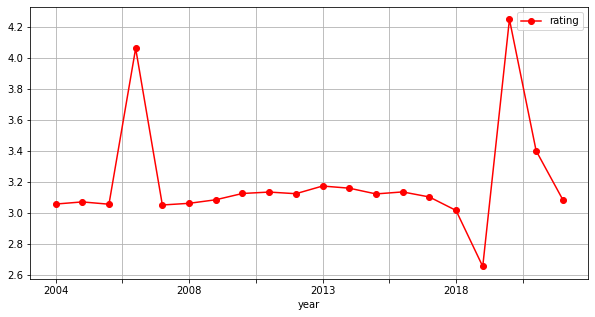

In [94]:
# plot last 20 avg ratings by year
yearly_avg[-20:].plot(x='year', y='rating', marker='o', color='r', figsize=(10,5), grid=True);